# EDA Sleep Health

In [2]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 01. 데이터 수집 및 로드

In [3]:
df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 02. 데이터 구조 및 변수 이해

In [4]:
print(df.shape) # 891행 12열
print(df.dtypes)
print()
df.info()

(374, 13)
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non

## 03. 데이터 요약 및 기술통계

In [5]:
df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [6]:
print(df.value_counts('Person ID'), end='\n\n')
print(df.value_counts('Gender'), end='\n\n')
print(df.value_counts('Age'), end='\n\n')
print(df.value_counts('Occupation'), end='\n\n')
print(df.value_counts('Sleep Duration'), end='\n\n')
print(df.value_counts('Quality of Sleep'), end='\n\n')
print(df.value_counts('Physical Activity Level'), end='\n\n')
print(df.value_counts('Stress Level'), end='\n\n')
print(df.value_counts('BMI Category'), end='\n\n')
print(df.value_counts('Blood Pressure'), end='\n\n')
print(df.value_counts('Heart Rate'), end='\n\n')
print(df.value_counts('Daily Steps'), end='\n\n')
print(df.value_counts('Sleep Disorder'), end='\n\n')

Person ID
1      1
247    1
256    1
255    1
254    1
      ..
123    1
122    1
121    1
120    1
374    1
Name: count, Length: 374, dtype: int64

Gender
Male      189
Female    185
Name: count, dtype: int64

Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: count, dtype: int64

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1    15
8.4    14
7.3    14
8.0    13
8.5    13

## 04. 결측치, 이상치 탐지

In [7]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
# df.duplicated('PassengerId').sum()

In [9]:
# df['Age'].plot(kind='box')
# plt.show()

## 05. 변수분포 시각화

### 1) Scatterplot

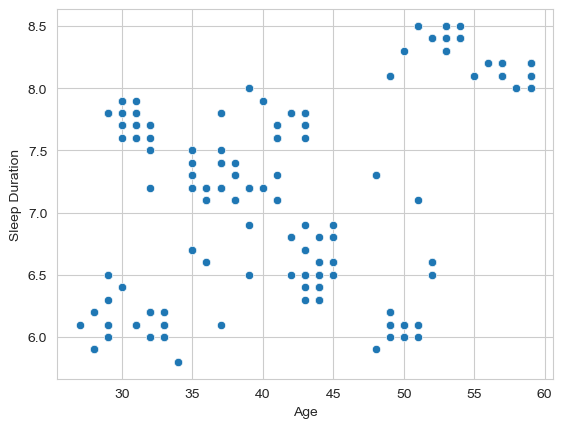

In [10]:
sns.scatterplot(data=df, x='Age', y='Sleep Duration')
plt.show()
# 나이에 따른 수면 시간 확인

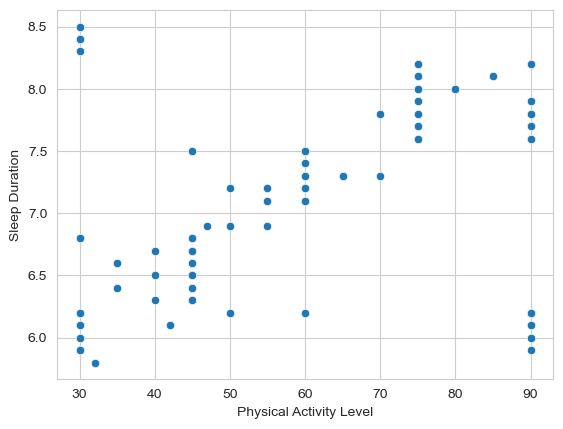

In [11]:
sns.scatterplot(data=df, x='Physical Activity Level', y='Sleep Duration')
plt.show()
# 활동량이 수면 시간과의 상관관계 확인

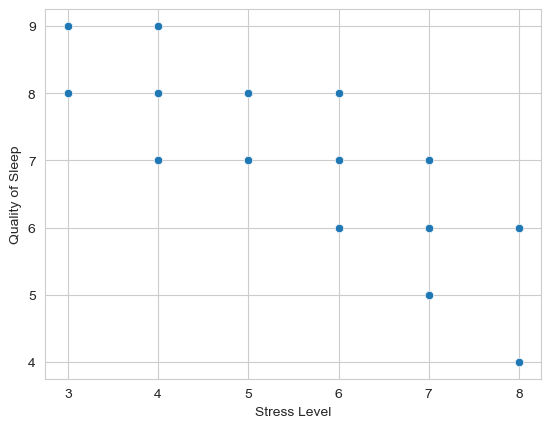

In [12]:
sns.scatterplot(data=df, x='Stress Level', y='Quality of Sleep')
plt.show()
# 스트레스가 수면의 질에 미치는 영향

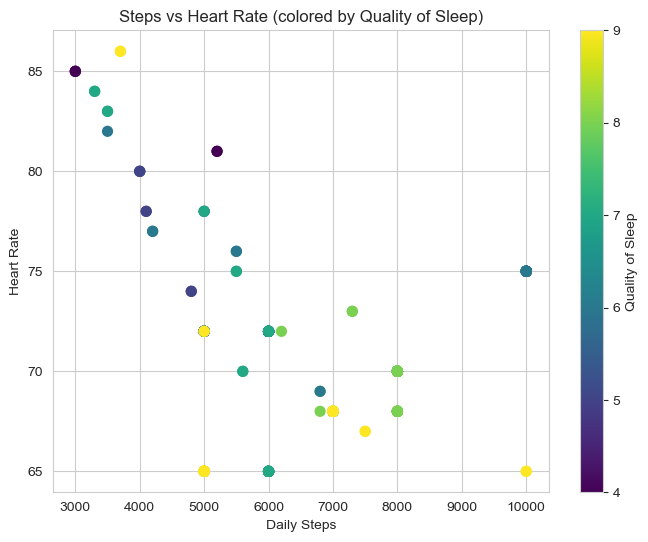

In [13]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Daily Steps'], df['Heart Rate'],
                      c=df['Quality of Sleep'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Quality of Sleep')
plt.xlabel('Daily Steps')
plt.ylabel('Heart Rate')
plt.title('Steps vs Heart Rate (colored by Quality of Sleep)')
plt.show()

# 심장박동과 일일 걸음수가 수면의 질에 끼치는 영향

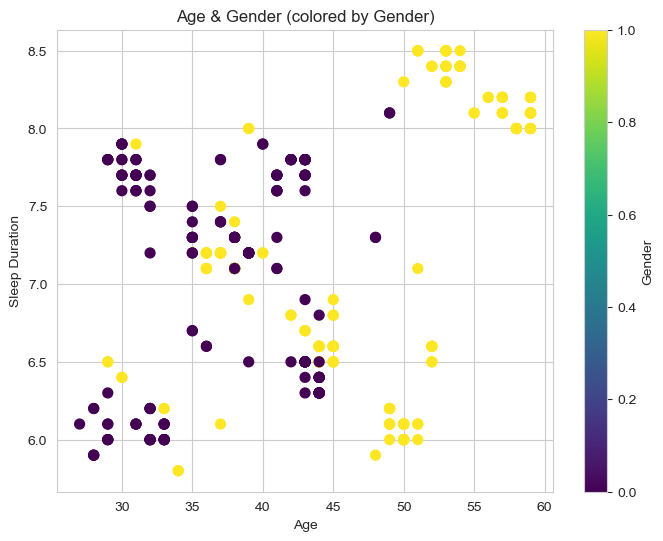

In [14]:
df['Gender_code'] = df['Gender'].map({'Male': 0, 'Female': 1})

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Age'], df['Sleep Duration'],
                      c=df['Gender_code'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Gender')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Age & Gender (colored by Gender)')
plt.show()
# 나이, 성별에 따른 수면시간 비교

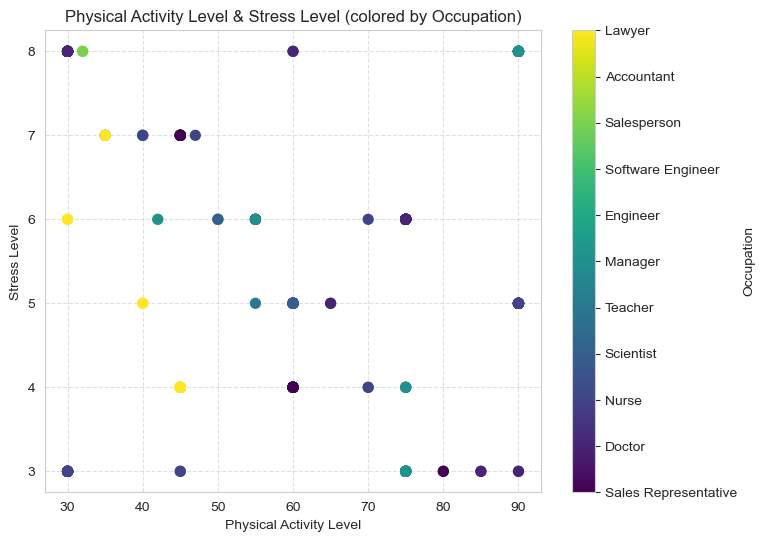

In [15]:
from sklearn.preprocessing import LabelEncoder

# 수치화
le = LabelEncoder()
df['Occupation_encoded'] = le.fit_transform(df['Occupation'])

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Physical Activity Level'], df['Stress Level'],
                      c=df['Occupation_encoded'], cmap='viridis', s=50)
# 컬러바 추가 및 설정
cbar = plt.colorbar(scatter) # 컬러바 객체를 변수에 할당
cbar.set_label('Occupation') # 컬러바의 전체 레이블 (제목)

# 컬러바의 눈금(ticks)과 레이블(labels)을 원본 직업 이름으로 설정
# 눈금 위치는 0, 1, 2... (인코딩된 숫자)
cbar.set_ticks(df['Occupation_encoded'].unique()) # 인코딩된 고유 숫자들을 눈금 위치로 설정
cbar.set_ticklabels(le.classes_) # 해당 눈금 위치에 원본 직업 이름을 레이블로 설정

plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.title('Physical Activity Level & Stress Level (colored by Occupation)')
plt.grid(True, linestyle='--', alpha=0.6) # 그리드 추가
plt.show()

# 직업에 따른 활동량과 스트레스 관계

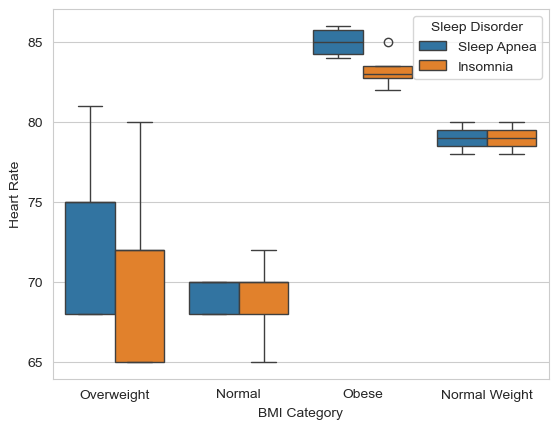

In [16]:
# 박스플롯 그리기
sns.boxplot(data=df, x='BMI Category', y='Heart Rate', hue='Sleep Disorder')
plt.show()
# BMI가 수면장애와 심장박동 수에 미치는 영향

## 06. 변수간 관계 시각화

## 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

In [17]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_code,Occupation_encoded
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844,0.584229,0.269343
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.596358,0.231188
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,0.121579,-0.325775
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,0.291366,-0.278071
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,-0.001454,-0.103660
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,-0.396018,0.021123
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,-0.217105,0.043928
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.014509,-0.105877
Gender_code,0.584229,0.596358,0.121579,0.291366,-0.001454,-0.396018,-0.217105,0.014509,1.000000,0.219113
Occupation_encoded,0.269343,0.231188,-0.325775,-0.278071,-0.103660,0.021123,0.043928,-0.105877,0.219113,1.000000


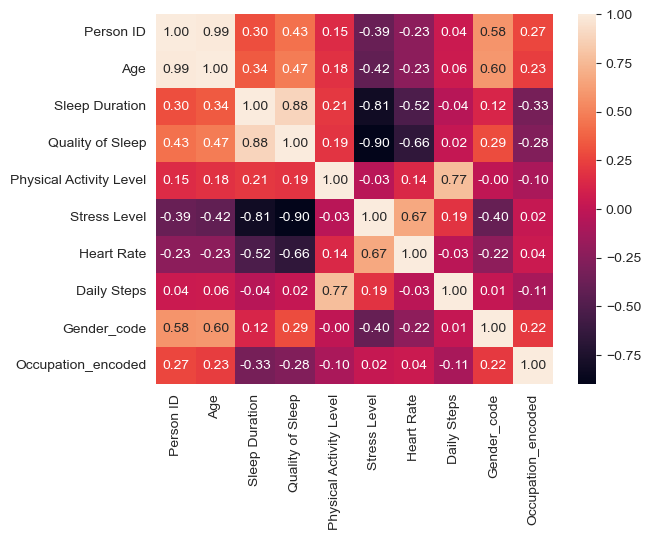

In [18]:
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

In [19]:
# 교차표
pd.crosstab(df['Age'], df['Sleep Duration'])

Sleep Duration,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,...,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5
Age,,,,,,,,,,,,,,,,,,,,,
27,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,3,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,4,2,0,1,0,2,0,0,...,0,0,4,0,0,0,0,0,0,0
30,0,0,0,0,0,0,2,0,0,0,...,1,4,2,4,0,0,0,0,0,0
31,0,0,0,3,0,0,0,0,0,0,...,3,8,3,1,0,0,0,0,0,0
32,0,0,7,0,4,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
33,0,0,7,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# 두 변수간 교차분석
pivot_age_pclass = df.pivot_table(index='Age', columns='Gender', values='Sleep Duration')
pivot_disorder_pclass = df.pivot_table(index='Sleep Disorder', columns='Gender', values='Sleep Duration', aggfunc='mean')
display(pivot_age_pclass)
display(pivot_disorder_pclass)

Gender,Female,Male
Age,,
27,NaN,6.100000
28,NaN,6.020000
29,6.500000,6.700000
30,6.400000,7.781818
31,7.900000,7.417647
32,NaN,6.588235
33,6.200000,6.036364
34,5.800000,NaN
35,7.200000,7.218182


Gender,Female,Male
Sleep Disorder,,
Insomnia,6.633333,6.551220
Sleep Apnea,7.035821,7.009091


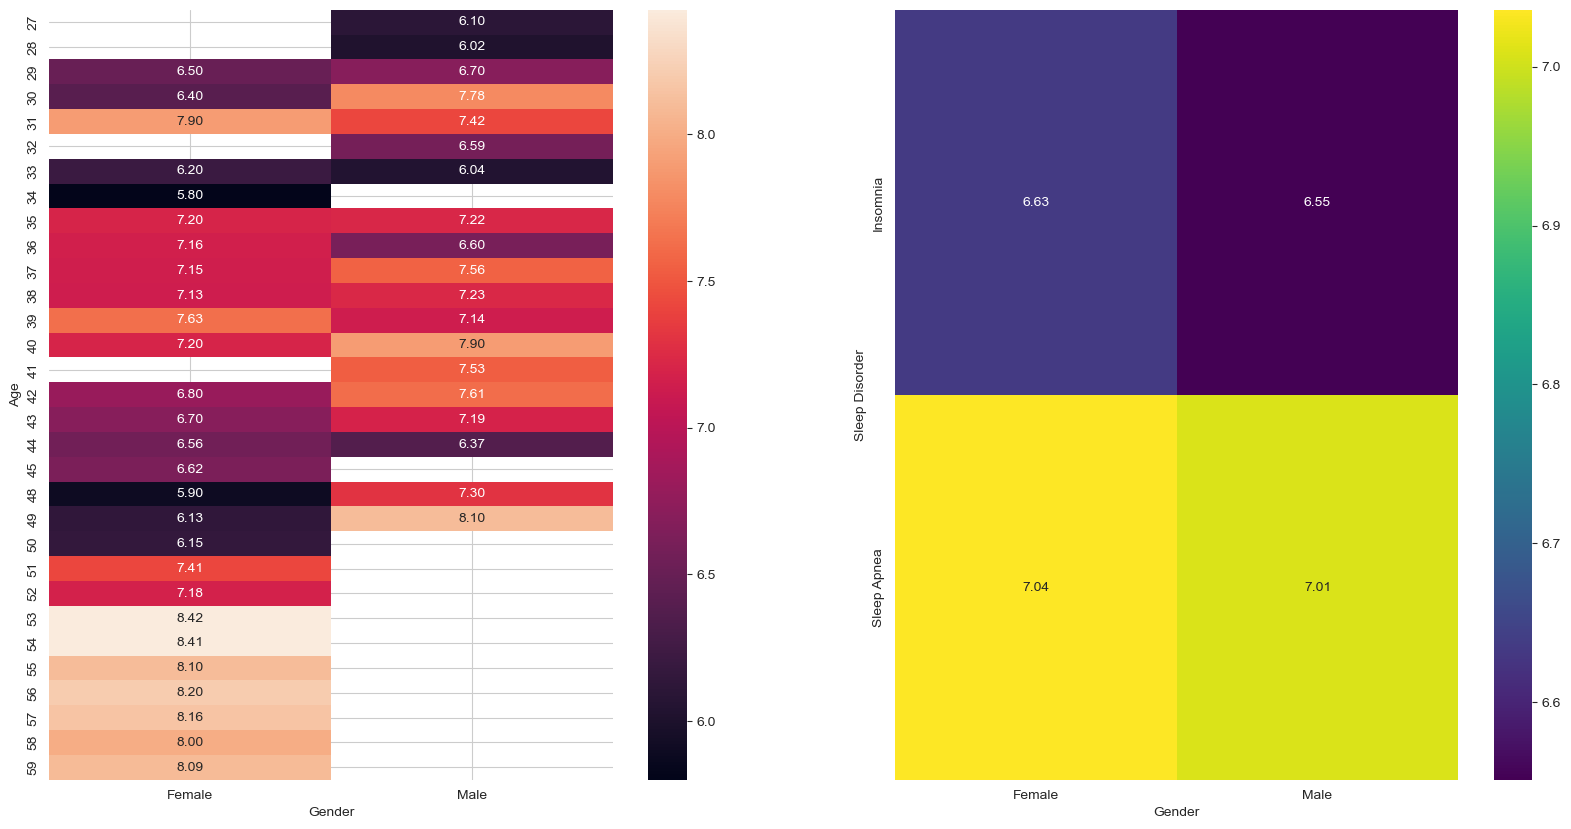

In [21]:
# 히트맵
_, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(pivot_age_pclass, annot=True, fmt='.2f', ax=ax[0])
sns.heatmap(pivot_disorder_pclass, annot=True, fmt='.2f', ax=ax[1], cmap='viridis')
plt.show()

## 08. 데이터전처리
- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

In [19]:
# 결측치처리
# 1. 기본값 또는 평균값 지정
# 2. 결측치 레코드 제거
print(df['Age'].info())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [20]:
# 결측치가 많은 컬럼 제거
# - drop('컬럼명', axis=1)
df = df.drop('Cabin', axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [21]:
# 결측치 행 제거
df.dropna(subset=['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 09. Feature Engineering
Feature(독립변수, 속성, 열) 가공.
- 새로운 변수 생성
- 그룹핑 처리
- 편향개선 (로그함수)
- 스케일링 (범위변경)

### 문자형 -> 수치형 변경
1. 범주형 -> 수치값
2. one-hot encoding 해당하는 값만 1이 되도록 변경

In [22]:
# !pip install scikit-learn -q

In [28]:
# 범주형데이터를 수치형으로 변경
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df.loc[:, 'Sex'] = encoder.fit_transform(df['Sex'])
print(encoder.classes_) # 라벨 순서대로 0,1f로 변환
df.head()

['female' 'male']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [31]:
# one hot encoding
df = pd.get_dummies(df, columns=['Embarked'], dtype=int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [33]:
# SibSp 형제자매/배우자
# Parch 부모/자식
# -> 가족수
df['Family'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0


In [36]:
# 나이그룹 범주형으로 변환
# df['AgeGroup'] = pd.cut(df['Age'],bins=[0, 10, 20, 30, 40, df['Age'].max()], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
df['AgeGroup'] = pd.cut(df['Age'],bins=[0, 10, 20, 30, 40, df['Age'].max()], labels=range(5)).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Family,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,1,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0,3


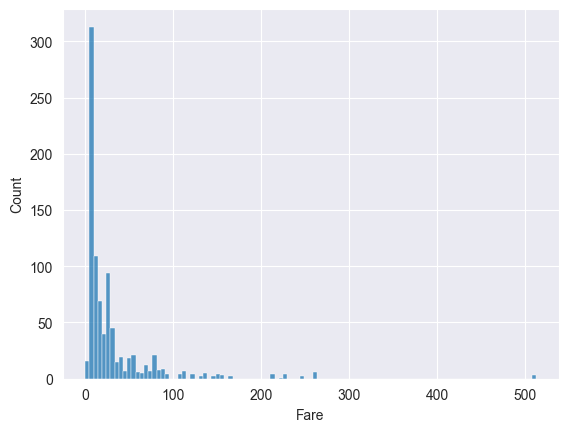

<Axes: xlabel='LogFare', ylabel='Count'>

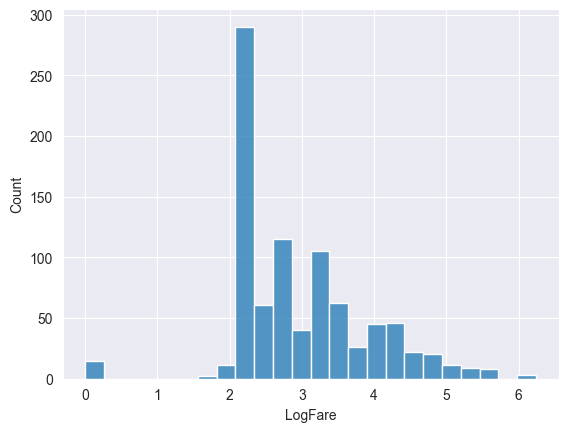

In [40]:
# 로그변환
# - 편향된 데이터를 다시 고른 분포로 변환 (평균/분산/편차 계산이 더 정확)
sns.histplot(data=df, x='Fare')
plt.show()

# np.log() -> np.log1p() : 0에 가까운 값처리에 유용
df['LogFare'] = df['Fare'].apply(lambda x: np.log1p(x))
sns.histplot(data=df, x='LogFare')

In [43]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Family,AgeGroup,LogFare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148,-0.040143,0.045450,-0.007425
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,0.016639,-0.046996,0.329862
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,0.065997,-0.325710,-0.661022
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.027121,-0.248512,0.936948,0.102485
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,0.890712,-0.241797,0.318528
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,0.783111,-0.171052,0.332186
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.217138,0.105505,0.787543
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,-0.046215,0.015740,0.262341
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.058592,-0.055699,-0.160456
Embarked_S,0.022148,-0.155660,0.081720,-0.027121,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,0.079977,0.015449,-0.135938


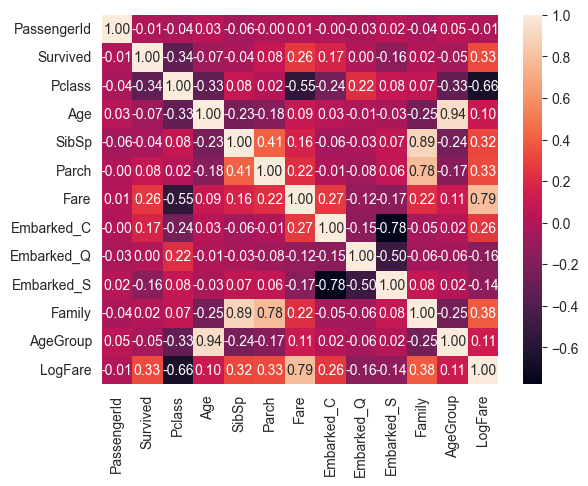

In [44]:
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

## 10. 최종요약/인사이트 도출

# 📝 EDA 레포트 작성 구조 (Markdown 기준 예시)
EDA(Exploratory Data Analysis, 탐색적 데이터 분석) 레포트는 데이터를 처음 접했을 때 **구조를 이해하고, 패턴을 발견하며, 문제점을 파악**하는 과정을 **체계적으로 문서화**하는 보고서이다.


#### 1. **프로젝트 개요**

* 분석 목적: 무엇을 알고자 하는가?
* 데이터 출처 및 설명: 어디서 수집했는가? 어떤 데이터인가?

```markdown
## 1. 프로젝트 개요
- 목적: 고객 이탈 예측을 위한 데이터 구조 파악 및 전처리 방향 설정
- 데이터 출처: Kaggle - Telco Customer Churn Dataset
- 데이터 구성: 총 21개 컬럼, 7043개 행
```


#### 2. **데이터 기본 정보 확인**

* 행/열 수
* 각 변수 이름, 타입, 결측치 여부 등

```markdown
## 2. 데이터 기본 정보
- 총 데이터 수: 7043개
- 컬럼 수: 21개
- 주요 컬럼: `gender`, `SeniorCitizen`, `MonthlyCharges`, `Churn` 등
```


#### 3. **기술 통계 및 데이터 요약**

* 수치형 변수: 평균, 중앙값, 표준편차, 최소/최대
* 범주형 변수: 각 범주의 빈도수 및 비율

```markdown
## 3. 기술 통계 요약
### 수치형 변수
| 컬럼명           | 평균    | 중앙값  | 표준편차 | 최솟값 | 최댓값 |
|------------------|--------|--------|---------|--------|--------|
| MonthlyCharges   | 64.76  | 70.35  | 30.09   | 18.25  | 118.75 |

### 범주형 변수
| 컬럼명    | 고유값 | 최빈값 | 분포                           |
|-----------|--------|--------|--------------------------------|
| gender    | 2개    | Male   | Male: 51%, Female: 49%         |
| Churn     | 2개    | No     | No: 73.5%, Yes: 26.5%          |
```

#### 4. **결측치 및 이상치 탐색**

* 각 컬럼의 결측치 수
* 이상치 탐색 방법: boxplot, IQR, 도수분포 등

```markdown
## 4. 결측치 및 이상치 탐색
- `TotalCharges`: 11건 결측치 발견 → 0일 사용 고객으로 판단되어 제거
- `MonthlyCharges`: 이상치 없음 (boxplot 기준)
```

---

#### 5. **변수 간 관계 분석**

* 시각화: 히스토그램, 상자 그림, 산점도, heatmap
* 상관분석: 수치형 변수 간 상관계수
* 그룹 비교: 생존/이탈 여부에 따른 요금 차이 등

```markdown
## 5. 변수 간 관계 분석
- `MonthlyCharges`와 `Churn` 관계: 이탈 고객의 평균 요금이 더 높음
- `tenure`와 `Churn` 관계: 체류 기간이 길수록 이탈 확률이 낮음
```

#### 6. **파생 변수 생성 및 전처리 제안**

* 범주형 그룹핑, 나이 구간화 등
* 로그변환, 정규화 여부

```markdown
## 6. 파생 변수 및 전처리
- `tenure` → 구간화(`Short`, `Medium`, `Long`)
- `MonthlyCharges` → 로그 변환
```

#### 7. **요약 및 인사이트 도출**

* 주요 특징 정리
* 모델링 방향성 제시

```markdown
## 7. 요약 및 인사이트
- 이탈 고객은 월 요금이 높고, 체류 기간이 짧은 경향
- `Contract` 유형(1년/2년)은 이탈률과 큰 연관 있음
- 향후 모델에서 주요 변수로 사용 가능: `Contract`, `MonthlyCharges`, `tenure`
```